# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-conicas_espacio.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos de cónicas en el espacio

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Matrices de rotación generales

Cálculo de una matriz de rotación general obtenida por multiplicación de las tres matrices de rotación en los ángulos de Euler:

In [4]:
#Angulos
from numpy import pi
Omega=pi/6
omega=pi/3
i=pi/4

#Matrices indiduales
from spiceypy import rotate
RzOmega=rotate(Omega,3)
Rxi=rotate(i,1)
Rzomega=rotate(omega,3)

from spiceypy import mxm
M=mxm(Rzomega,mxm(Rxi,RzOmega))

print(f"M = \n{M}")

M = 
[[ 0.12682648  0.78033009  0.61237244]
 [-0.9267767  -0.12682648  0.35355339]
 [ 0.35355339 -0.61237244  0.70710678]]


Cálculo de la matriz de rotación usando la rutina `eul2m` de `SPICE`: 

In [5]:
from spiceypy import eul2m
M=eul2m(omega,i,Omega,3,1,3)

print(f"M = \n{M}")

M = 
[[ 0.12682648  0.78033009  0.61237244]
 [-0.9267767  -0.12682648  0.35355339]
 [ 0.35355339 -0.61237244  0.70710678]]


Propiedades de la matriz de rotación:

In [6]:
#Determinante
from numpy.linalg import det
detM=det(M)

#Inversa
from numpy.linalg import inv
Minv=inv(M)

#Inversa por definicion
Minv_def=eul2m(-Omega,-i,-omega,3,1,3)

#Transpuesta
MT=M.transpose()

print(f"det(M) = {detM:g}")
print(f"inversa M (numérica) = \n{Minv}")
print(f"inversa M (definición) = \n{Minv_def}")
print(f"transpuesta M = \n{MT}")

det(M) = 1
inversa M (numérica) = 
[[ 0.12682648 -0.9267767   0.35355339]
 [ 0.78033009 -0.12682648 -0.61237244]
 [ 0.61237244  0.35355339  0.70710678]]
inversa M (definición) = 
[[ 0.12682648 -0.9267767   0.35355339]
 [ 0.78033009 -0.12682648 -0.61237244]
 [ 0.61237244  0.35355339  0.70710678]]
transpuesta M = 
[[ 0.12682648 -0.9267767   0.35355339]
 [ 0.78033009 -0.12682648 -0.61237244]
 [ 0.61237244  0.35355339  0.70710678]]


### Gráfico de la cónica en el espacio

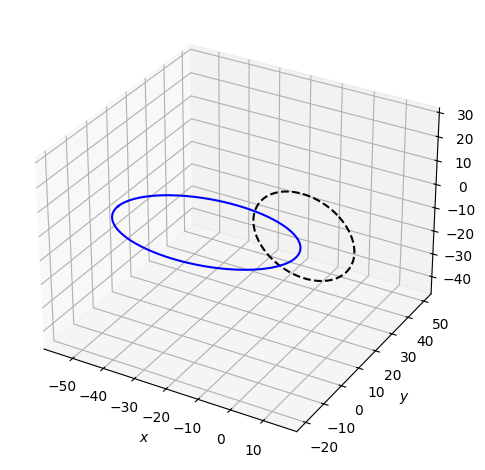

In [12]:
from pymcel.export import puntos_conica
p=10.0
e=0.8
xppps,yppps,zppps=puntos_conica(p,e)

from pymcel.export import rota_puntos
xs,ys,zs=rota_puntos(M,xppps,yppps,zppps)

# Grafica
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

#Gráfica de los puntos originales
ax.plot(xs,ys,zs,'k--')

#Gráfica de la cónica rotada
ax.plot(xppps,yppps,zppps,'b-')

#Decoración
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

from pymcel.plot import fija_ejes3d_proporcionales
fija_ejes3d_proporcionales(ax);
fig.tight_layout();

Interactivo para calcular cónica a partir de los elementos orbitales:

In [20]:
from ipywidgets import interact

@interact(Omega=(0,360,1),omega=(0,360,1),i=(-90,90,1),e=(0,1,0.1))
def conica_de_elementos(p=10.0,e=0.8,i=0.0,Omega=0.0,omega=0.0,
                        df=0.1,
                        elev=30,azim=60,
                        figreturn=False):

    #Convierte elementos angulares en radianes
    from numpy import pi
    p=float(p)
    e=float(e)
    i=float(i)*pi/180
    Omega=float(Omega)*pi/180
    omega=float(omega)*pi/180
    
    #Compute fmin,fmax
    if e<1:
        fmin=-pi
        fmax=pi
    elif e>1:
        from numpy import arccos
        psi=arccos(1/e)
        fmin=-pi+psi+df
        fmax=pi-psi-df
    else:
        fmin=-pi+df
        fmax=pi-df
            
    #Valores del ángulo
    from numpy import linspace,pi
    fs=linspace(fmin,fmax,500)

    #Distancia al periapsis
    q=p/(1+e)

    #Distancia al foco
    from numpy import sin,cos
    rs=p/(1+e*cos(fs))

    #Coordenadas
    xs=rs*(cos(Omega)*cos(omega+fs)-cos(i)*sin(Omega)*sin(omega+fs))
    ys=rs*(sin(Omega)*cos(omega+fs)+cos(i)*cos(Omega)*sin(omega+fs))
    zs=rs*(cos(fs)*sin(omega)*sin(i)+sin(fs)*cos(omega)*sin(i))
    
    #Posición del periapsis (f=0)
    xp=q*(cos(Omega)*cos(omega)-cos(i)*sin(Omega)*sin(omega))
    yp=q*(sin(Omega)*cos(omega)+cos(i)*cos(Omega)*sin(omega))
    zp=q*sin(omega)*sin(i)
    
    #Posición del nodo ascendente
    rn=p/(1+e*cos(omega))
    xn=rn*cos(Omega)
    yn=rn*sin(Omega)
    zn=0
    
    #Gráfico
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    plt.close("all")
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')

    #Gráfica de los puntos originales
    ax.plot(xs,ys,zs,'b-')
    
    #Posición del periapsis
    ax.plot([0,xp],[0,yp],[0,zp],'r-')

    #Posición del nodo ascendente
    ax.plot([0,xn],[0,yn],[0,zn],'g-')

    #Fija punto de vista
    ax.view_init(elev=elev,azim=azim)
    
    #Decoración
    from pymcel.plot import fija_ejes3d_proporcionales
    xrange,yrange,zrange=fija_ejes3d_proporcionales(ax);

    ax.set_title(f"Cónica con:"+\
                 f"$p={p:.2f}$, $e={e:.2f}$, "+\
                 f"$i={i*180/pi:.2f}$, "+\
                 f"$\Omega={Omega*180/pi:.1f}$, "+\
                 f"$\omega={Omega*180/pi:.1f}$"
            )
    
    #Dibuja Ejes
    ax.plot([0,xrange[1]],[0,0],[0,0],'k-')
    ax.plot([0,0],[0,yrange[1]],[0,0],'k-')
    ax.plot([0,0],[0,0],[0,zrange[1]],'k-')
    ax.text(xrange[1],0,0,"$x$",ha='left',va='top')
    ax.text(0,yrange[1],0,"$y$",ha='left',va='top')
    ax.text(0,0,zrange[1],"$z$",ha='left',va='bottom')

    fig.tight_layout();
    
    plt.show()
    if figreturn:return fig

interactive(children=(FloatSlider(value=10.0, description='p', max=30.0, min=-10.0), FloatSlider(value=0.8, de…

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)